In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
data = pd.read_csv(r"C:\Users\Sarah\Documents\Ironhack-DAFT-Project7-ML-Netflix\imdb_processed_clean.csv")

In [176]:
data

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,tv mini series,7.7,474.0,50.000000,Documentary,Animation,United States,None,English,None,Christian Slater,Scott Sampson,Unknown,None,Unknown,None,Mike Carrol,Mike Carroll
1,1994,video movie,8.1,18.0,83.000000,Family,None,United States,None,English,None,Paula Abdul,Aurorah Allain,Steve Purcell,None,Unknown,None,Unknown,None
2,1992,movie,5.5,93.0,96.828211,Action,Sci-Fi,Japan,None,Japanese,None,Kai Shishido,Etsushi Takahashi,Yasuhiro Horiuchi,None,Carole King,None,Kazumasa Hirai,Jirô Kuwata
3,2004,movie,5.3,13432.0,60.000000,Documentary,Comedy,United States,None,English,German,Marlee Matlin,Elaine Hendrix,William Arntz,Betsy Chasse,Christopher Franke,None,William Arntz,Betsy Chasse
4,1991,movie,4.5,2177.0,96.000000,Comedy,Horror,United States,None,English,None,Brick Bronsky,Lisa Gaye,Eric Louzil,None,Bob Mithoff,None,Lloyd Kaufman,Carl Morano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1969,movie,3.9,4384.0,96.828211,Adventure,Family,Japan,None,Japanese,None,Tomonori Yazaki,Hideyo Amamoto,Ishirô Honda,Jun Fukuda,Kunio Miyauchi,None,Shinichi Sekizawa,None
8064,2005,episode,6.4,44.0,96.083333,Documentary,Biography,Unknown,None,English,Spanish,Rena Baskin,Fulgencio Batista,Adriana Bosch,M Pink Christofalo,Mason Daring,None,Adriana Bosch,None
8065,2001,tv movie,4.9,2376.0,96.359350,Sci-Fi,Thriller,United States,None,English,None,David Keith,Stephanie Niznik,Matt Codd,None,Richard McHugh,None,Jonathan Raymond,Jonathan Raymond
8066,2003,movie,6.3,6501.0,96.828211,Drama,Music,United States,Germany,English,None,Neve Campbell,Malcolm McDowell,Robert Altman,None,Van Dyke Parks,None,Neve Campbell,Barbara Turner


In [177]:
countries = data.groupby('country1', as_index=False)['genre1'].count()

In [178]:
countries.sort_values(by='genre1', inplace=True, ascending=False)
countries['country1'] = np.where(countries['genre1']<=5, "grouped countries(5)",countries['country1'])

In [179]:
countries.sort_values(by='genre1',ascending=False, inplace=True)


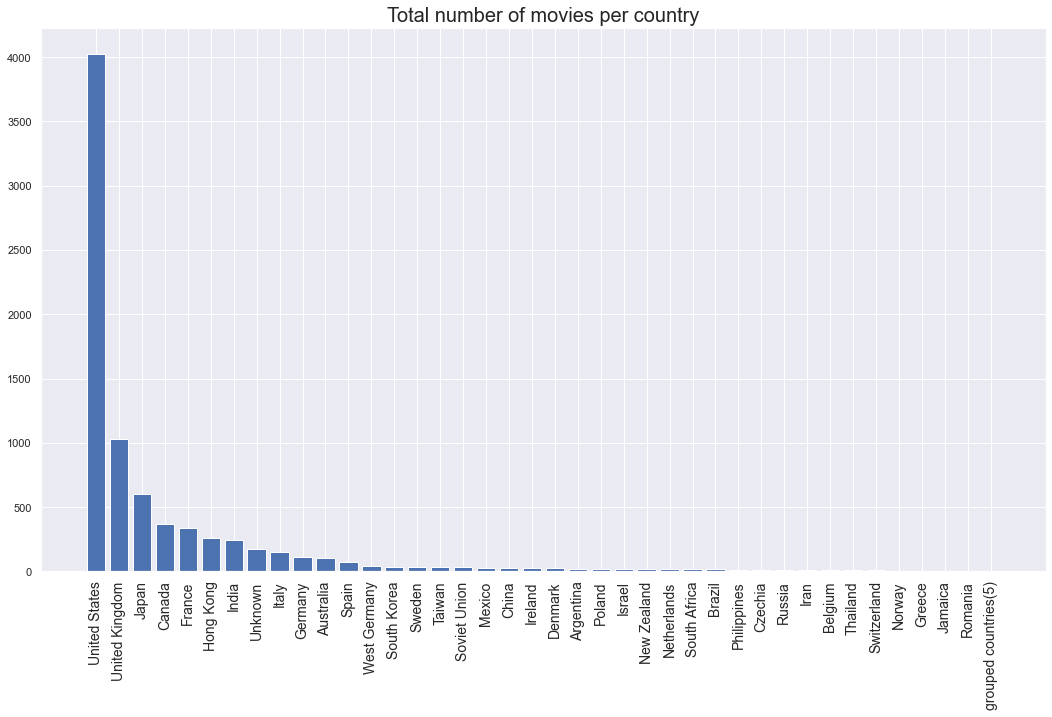

In [206]:
fig = plt.figure(figsize=(18,10))
plot1 = fig.add_subplot(111)
plot1.bar(x=countries['country1'], height=countries['genre1'])
plt.title('Total number of movies per country',{'fontsize': 20})

plt.xticks(rotation=90,fontsize=14)
plt.grid(True)
plt.show()

In [185]:
years = data.groupby('year', as_index=False)['genre1'].count()

In [190]:
years.sort_values(by='genre1', inplace=True, ascending=False)

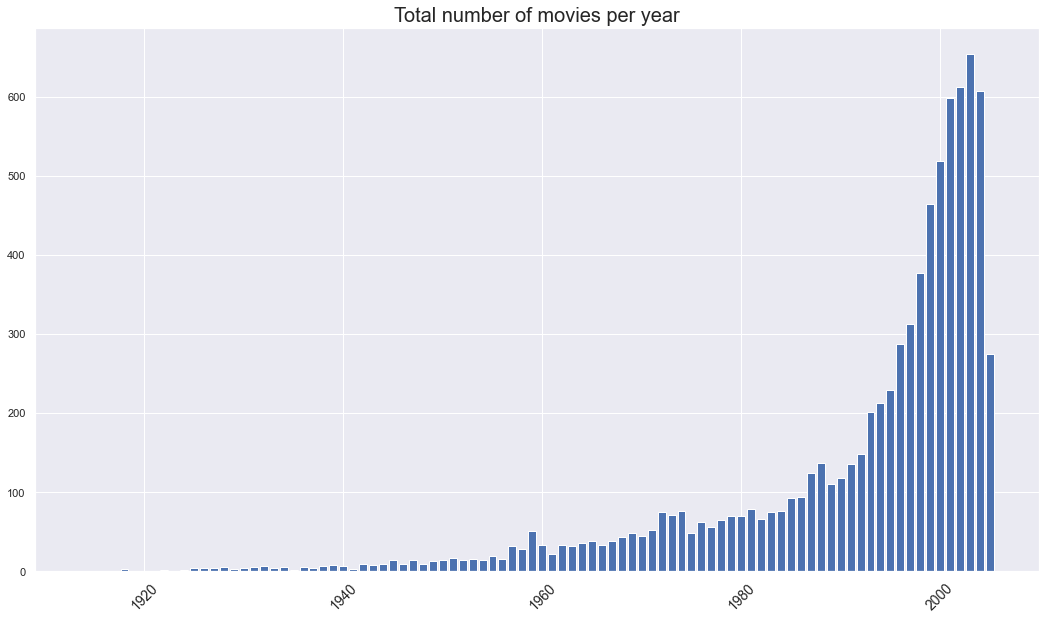

In [191]:
fig = plt.figure(figsize=(18,10))
plot1 = fig.add_subplot(111)
plot1.bar(x=years['year'], height=years['genre1'])
plt.title('Total number of movies per year',{'fontsize': 20})

plt.xticks(rotation=45,fontsize=14)
plt.grid(True)
plt.show()

In [173]:
country_genre = data.groupby('country1', as_index=False)['genre1'].max()


In [171]:
country = data.groupby(['genre1','country1'],as_index=False)['kind'].count()


In [172]:
countries = country['country1'].unique()


In [115]:
df = pd.DataFrame(columns=['genre1', 'country1', 'kind'])
for i in countries:
    a =country[country['country1']==i]
    a = a[a['kind']==a.kind.max()]
    df = df.append(a)


In [146]:
df.sort_values(by='kind', ascending=False, inplace=True)


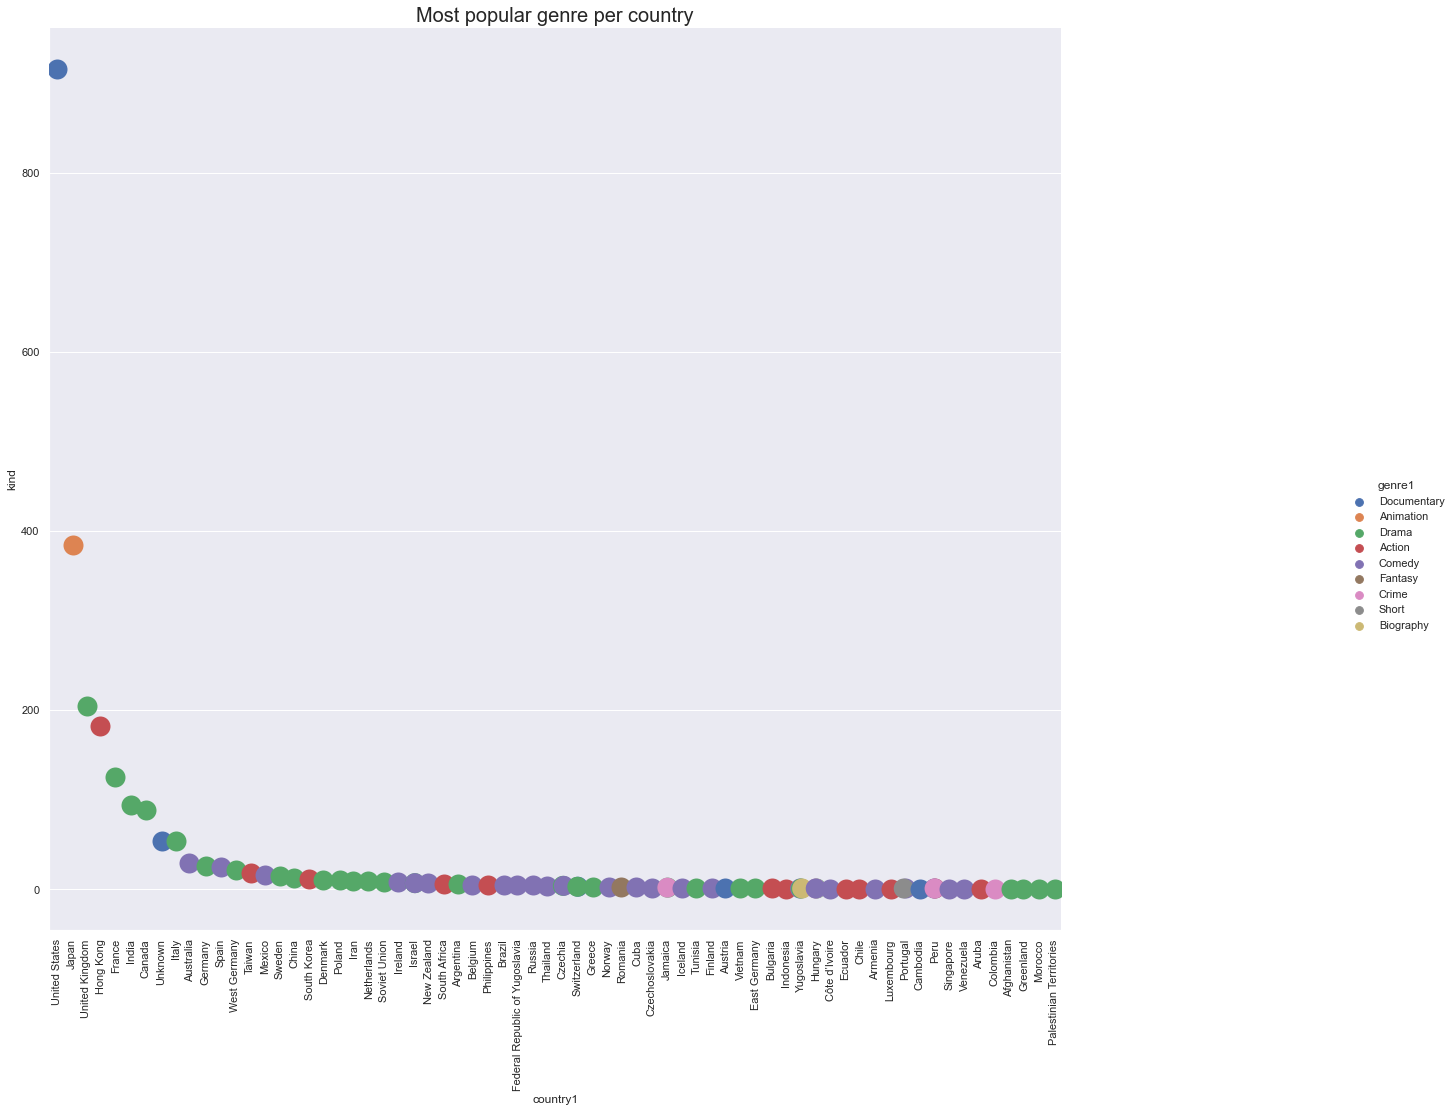

In [205]:
g=sns.catplot(x='country1', y='kind', hue="genre1", data=df, s=20)
plt.xticks(rotation=90)
plt.title('Most popular genre per country',{'fontsize': 20})
g.fig.set_size_inches(23,15)


In [148]:
year = data.groupby(['genre1','year'],as_index=False)['kind'].count()
year

,genre1,year,kind
0,Action,1914,1
1,Action,1926,1
2,Action,1928,1
3,Action,1931,1
4,Action,1936,1
...,...,...,...
825,Western,1996,1
826,Western,1999,1
827,Western,2002,1
828,Western,2003,1


In [149]:
years = year['year'].unique()
years

array([1914, 1926, 1928, 1931, 1936, 1938, 1941, 1944, 1945, 1948, 1949,
       1950, 1951, 1952, 1954, 1955, 1956, 1957, 1958, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 1924,
       1929, 1930, 1940, 1953, 1959, 1942, 1947, 1927, 1933, 1937, 1918,
       1923, 1925, 1932, 1934, 1939, 1943, 1935, 1946, 1922, 1916, 1919],
      dtype=int64)

In [154]:
df2 = pd.DataFrame(columns=['genre1', 'kind'])
for i in years:
    a =year[year['year']==i]
    a = a[a['kind']==a.kind.max()]
    df2 = df2.append(a)

In [199]:
df2

,genre1,kind,year
0,Action,1,1914.0
425,Drama,1,1916.0
222,Comedy,3,1918.0
426,Drama,1,1919.0
368,Documentary,2,1922.0
223,Comedy,1,1923.0
65,Adventure,1,1924.0
224,Comedy,1,1924.0
427,Drama,1,1925.0
225,Comedy,1,1925.0


In [200]:
df2['year'] = df2['year'].astype(int)

In [201]:
df2.sort_values(by='year', inplace=True)
df2

,genre1,kind,year
0,Action,1,1914
425,Drama,1,1916
222,Comedy,3,1918
426,Drama,1,1919
368,Documentary,2,1922
223,Comedy,1,1923
65,Adventure,1,1924
224,Comedy,1,1924
427,Drama,1,1925
225,Comedy,1,1925


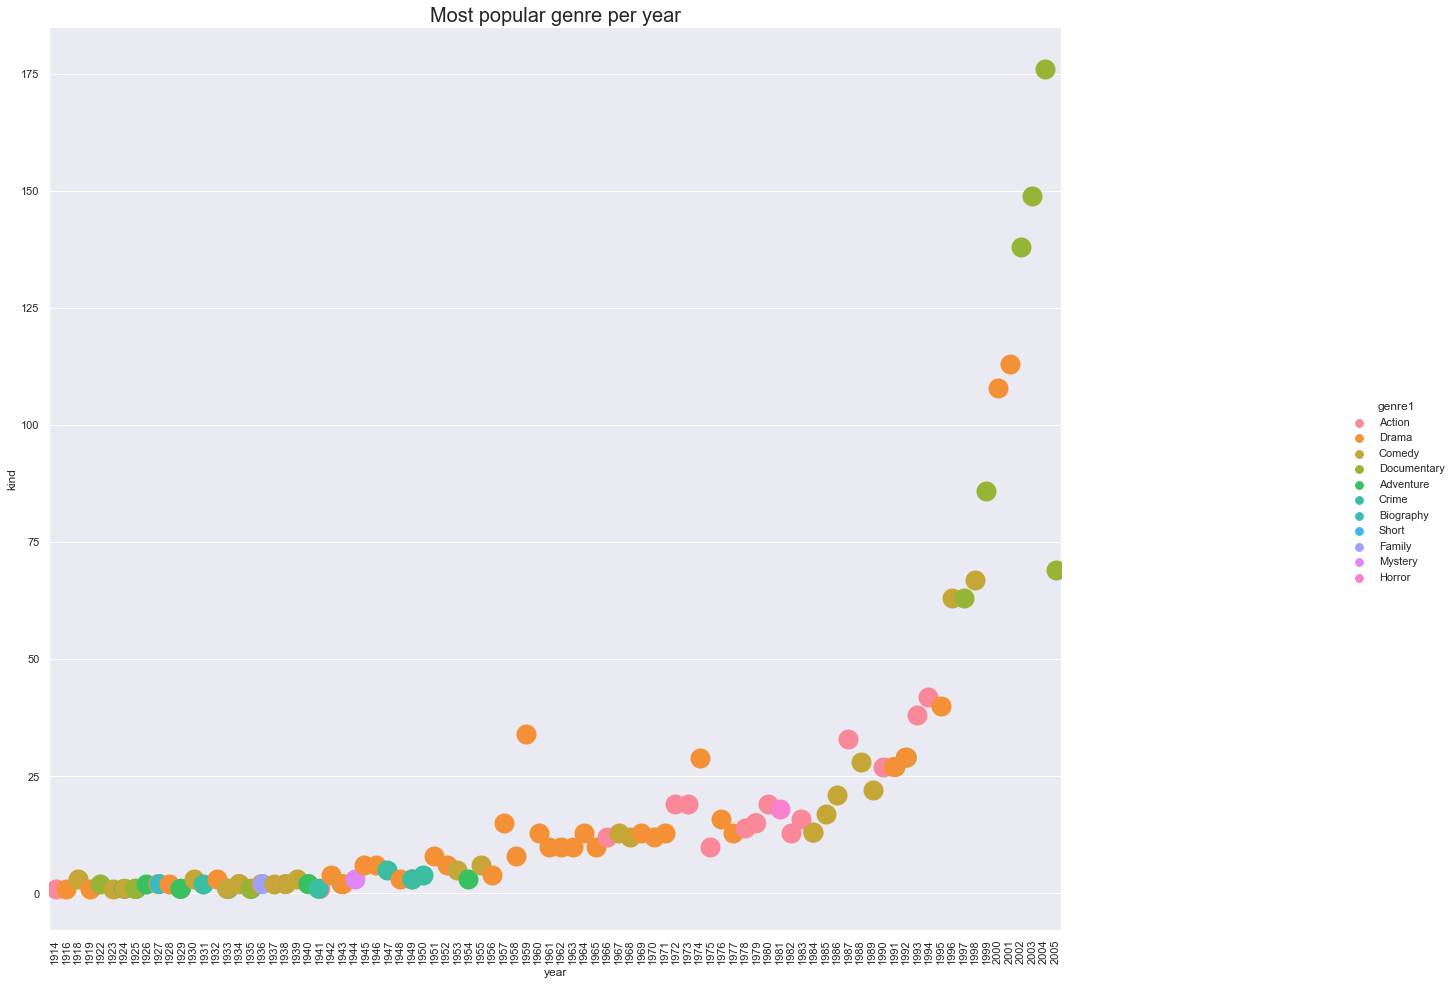

In [203]:
g=sns.catplot(x='year', y='kind', hue="genre1", data=df2, s=20)
plt.xticks(rotation=90)
plt.title('Most popular genre per year',{'fontsize': 20})
g.fig.set_size_inches(23,15)